In [48]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

eval_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

sample data
---


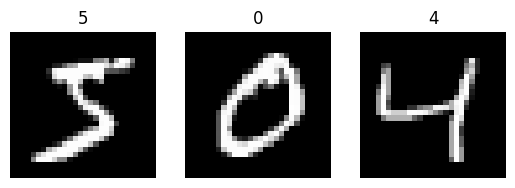

In [100]:
import matplotlib.pyplot as plt

rows = 3

fig = plt.figure()

print('sample data')
for x in range(rows):
    img, label = training_data[x]
    fig.add_subplot(1,rows, x+1)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
print('---')

In [7]:
from sklearn.neighbors import KNeighborsClassifier

training_data_X = training_data.data.numpy().reshape(-1, 28*28)
training_data_y = training_data.targets.numpy()
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(training_data_X, training_data_y)

print(knn_classifier.predict(training_data_X[0].reshape(-1, 28*28)))



[5]


10000
9665.0


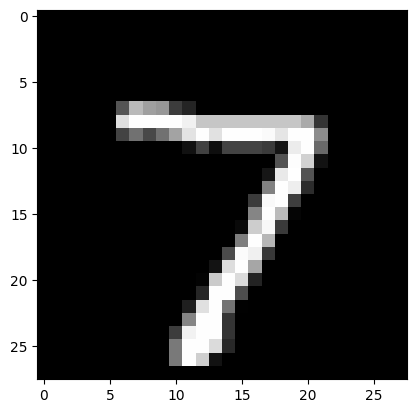

In [9]:
from sklearn.metrics import accuracy_score
# evaluate training
plt.imshow(eval_data[0][0].squeeze(), cmap='gray')
test_data_X = eval_data.data.numpy().reshape(-1, 28*28)
test_data_y = eval_data.targets.numpy()

predictions = knn_classifier.predict(test_data_X)
print(len(predictions))
print(accuracy_score(test_data_y, predictions, normalize=False))

In [192]:
from torch import nn
import os
import torch
# neural network
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


class NeuralNetwork(nn.Module): 
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.sequential = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.Softmax()
        )
        
    def forward(self,x):
        x = self.flatten(x)
        res = self.sequential(x)
        return res
    
model = NeuralNetwork()
X = torch.rand(1, 28, 28)
print(model(X))

        

tensor([[0.0971, 0.1191, 0.0801, 0.0882, 0.0931, 0.0995, 0.1058, 0.1049, 0.1089,
         0.1033]], grad_fn=<SoftmaxBackward0>)


In [193]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 100*100)
def train_loop(dataloader, model, loss_fn, optimizer):
    print("Rozpoczynanie uczenia sieci")
    model.train()
    for curr_batch, (x,y) in enumerate(dataloader):
        # print("Przetwarzanie serii nr:", curr_batch)
        print("Przetwarzanie serii nr:", curr_batch)
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if curr_batch % 100 == 0:
            print(loss.item())
        
        
    


training_epochs = 10
for epoch in range(training_epochs):
    print("EPOCH:" ,epoch+1)
    train_loop(train_dataloader, model,loss_fn, optimizer)
    print("done")

EPOCH: 1
Rozpoczynanie uczenia sieci
Przetwarzanie serii nr: 0
2.3049113750457764
Przetwarzanie serii nr: 1
Przetwarzanie serii nr: 2
Przetwarzanie serii nr: 3
Przetwarzanie serii nr: 4
Przetwarzanie serii nr: 5
Przetwarzanie serii nr: 6
Przetwarzanie serii nr: 7
Przetwarzanie serii nr: 8
Przetwarzanie serii nr: 9
Przetwarzanie serii nr: 10
Przetwarzanie serii nr: 11
Przetwarzanie serii nr: 12
Przetwarzanie serii nr: 13
Przetwarzanie serii nr: 14
Przetwarzanie serii nr: 15
Przetwarzanie serii nr: 16
Przetwarzanie serii nr: 17
Przetwarzanie serii nr: 18
Przetwarzanie serii nr: 19
Przetwarzanie serii nr: 20
Przetwarzanie serii nr: 21
Przetwarzanie serii nr: 22
Przetwarzanie serii nr: 23
Przetwarzanie serii nr: 24
Przetwarzanie serii nr: 25
Przetwarzanie serii nr: 26
Przetwarzanie serii nr: 27
Przetwarzanie serii nr: 28
Przetwarzanie serii nr: 29
Przetwarzanie serii nr: 30
Przetwarzanie serii nr: 31
Przetwarzanie serii nr: 32
Przetwarzanie serii nr: 33
Przetwarzanie serii nr: 34
Przetwarz

7 - seven


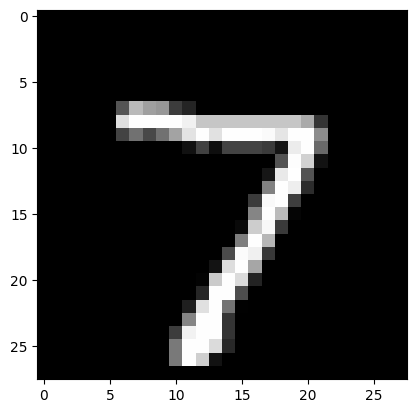

In [204]:
#EVALUATE NEURAL NETWORK
model.eval()
image, target = eval_data.__getitem__(0)
plt.imshow(image.squeeze(), cmap='gray')
pred = model(image)
_, index = torch.max(pred,1)
print(eval_data.classes[index])
